In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LinearRegression  #선형회귀(리니어리그레이션)
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn.tree import DecisionTreeRegressor #의사결정트리(디시젼트리리그레이션)
from sklearn.preprocessing import MinMaxScaler # 스케일러(민맥스스케일러)
from sklearn.linear_model import Lasso, Ridge  # 선형회귀 바탕으로 만들어진 러닝모델(라쏘, 릿지)

최종투자단계를 없애고 돌린 데이터

In [4]:
# 데이터 프레임 불러오기
df = pd.read_csv("fix_sale_final_ml_data_0816.csv", encoding = 'utf-8')

In [5]:
# 최종투자단계 drop 세로 방향으로 날림, 원본 적용
df.drop("최종투자단계", axis = 1, inplace = True)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

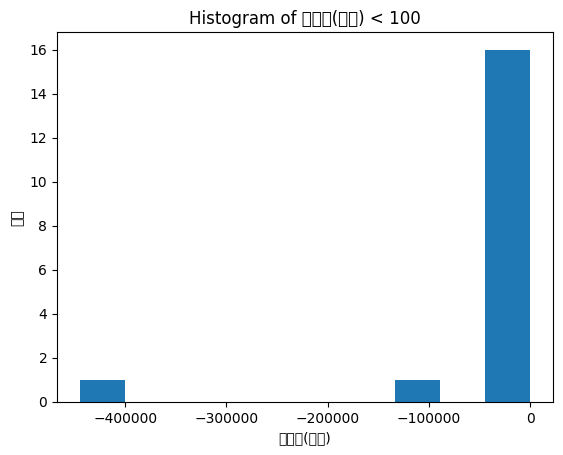

In [6]:
# 히스토그램 그리기

sales_data = df['연매출(만원)']

# 100보다 작은 값만 선택
sales_data_filtered = sales_data[sales_data < 100]

# 히스토그램 생성
plt.hist(sales_data_filtered, bins=10)  # 'bins' 값을 조정하여 막대의 개수 설정

# 그래프 제목과 레이블 설정
plt.title('Histogram of 연매출(만원) < 100')
plt.xlabel('연매출(만원)')
plt.ylabel('빈도')

# 그래프 출력
plt.show()

In [7]:
# 연매출 0원 이상인것만 남김
df = df[df["연매출(만원)"] > 0]

# 연매출 2500억 미만인 기업만 남김
df = df[df["연매출(만원)"] < 250000000]

In [8]:
# 독립변수와 종속변수 나누기
X = df.drop(['연매출(만원)'], axis = 1)
y = df['연매출(만원)']

In [9]:
# y 데이터 스케일링 식은 (y - 최솟값) / (최댓값 - 최솟값) <- 정규화 공식임
s_y = ((y - y.min()) / (y.max() - y.min()))

In [10]:
# 데이터셋 나누기
train_x, test_x, train_y, test_y = train_test_split(X, s_y, random_state= 42, test_size = 0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((708, 25), (178, 25), (708,), (178,))

In [12]:
# 연매출이기 때문에 회귀 -> 비교적 MinMaxScaler가 좋음
s = MinMaxScaler()
s.fit(train_x)
s_train_x = s.transform(train_x)
s_test_x = s.transform(test_x)

In [13]:
# 모델 5개 이용해서 전반적인 경향성 점수 확인
m = LinearRegression()
m1 = KNeighborsRegressor()
m2 = DecisionTreeRegressor()
m3 = Lasso()
m4 = Ridge()
for i in [m, m1, m2, m3, m4]:
    print(i, cross_val_score(i, s_train_x, train_y, cv = 5).mean())

# LinearRegression 이 제일 잘 나옴

LinearRegression() 0.9398655400386955
KNeighborsRegressor() 0.5186732931274969
DecisionTreeRegressor() 0.8438110958935802
Lasso() -0.022004830620112825
Ridge() 0.91931698798697


In [14]:
m.fit(s_train_x, train_y) # 학습
m.score(s_train_x, train_y), m.score(s_test_x, test_y) # 점수

(0.9965124113869228, 0.9973302829780326)

In [15]:
# mse 오차율 검증하는거(평균제곱오차)
from sklearn.metrics import mean_squared_error
pre_train_y = m.predict(s_train_x) # train_data 예측값 저장
pre_test_y = m.predict(s_test_x)   # test_data 예측값 저장
# 점수, 오차율 출력(실제 정답값과 예측값의 차이)
print(f"""train_data_score : {m.score(s_train_x, train_y)}, test_data_score : {m.score(s_test_x, test_y)}""")
print(f"""train_data_MSE : {mean_squared_error(train_y, pre_train_y)}, test_data_MSE : {mean_squared_error(test_y, pre_test_y)}""")

train_data_score : 0.9965124113869228, test_data_score : 0.9973302829780326
train_data_MSE : 1.6185353847646176e-05, test_data_MSE : 1.9612704708302558e-05


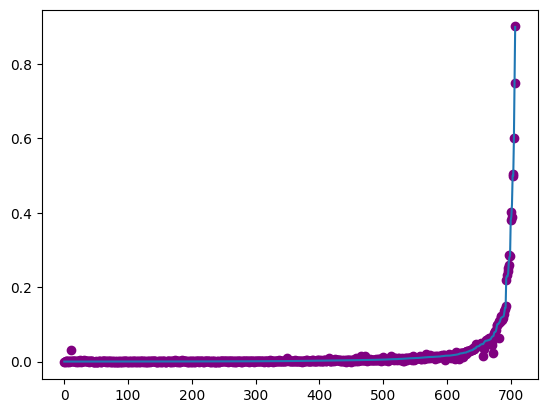

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


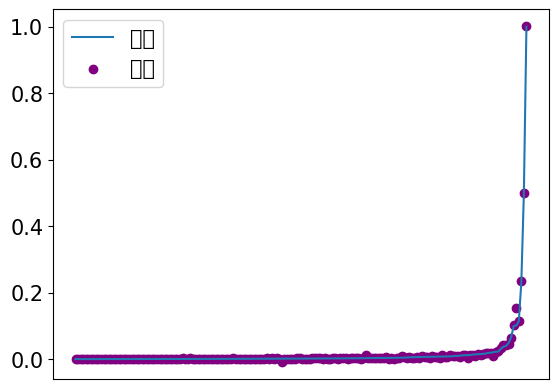

In [16]:
# LinearRegression의 예측값과 실제값의 그래프로 그림
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, s_y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

df_show = pd.DataFrame(np.concatenate([y_train.values.reshape(-1, 1), y_train_pred.reshape(-1, 1)], axis = 1), columns = ['y_train', 'y_train_pred'])
df_show = df_show.sort_values(by = 'y_train').reset_index(drop = True)

plt.plot(df_show['y_train'])
plt.scatter(df_show.index, df_show['y_train_pred'], color = 'purple')
plt.show()

df_show = pd.DataFrame(np.concatenate([y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1)], axis = 1), columns = ['y_test', 'y_pred'])
df_show = df_show.sort_values(by = 'y_test').reset_index(drop = True)

plt.plot(df_show['y_test'], label = "정답")
plt.scatter(df_show.index, df_show['y_pred'], color = 'purple', label = '예측')
plt.xticks([])
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


In [17]:
# 아예 새로운 데이터 예측 해보려고 데이터프레임 불러옴

test_df = pd.read_csv("test_data.csv", encoding = 'cp949')
s_test_df = s.transform(test_df)

In [18]:
m_l = m.predict(s_test_df)
for i in m_l:
    print((((i* (y.max() - y.min())) + y.min())).round(2))

115226.79
337089.74
138046.41
526881.8
484595.66


# 똑같은 러닝이지만 피쳐 몇개 제거 해보는 시도

In [19]:
X = df.drop(['연매출(만원)', '공동 창업자 수', '투자점수', '특허기술 평균등급'], axis = 1)
y = df['연매출(만원)']

In [20]:
s_y = ((y - y.min()) / (y.max() - y.min()))

In [21]:
train_x, test_x, train_y, test_y = train_test_split(X, s_y, random_state= 42, test_size = 0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((620, 22), (266, 22), (620,), (266,))

In [22]:
s = MinMaxScaler()
s.fit(train_x)
s_train_x = s.transform(train_x)
s_test_x = s.transform(test_x)

In [23]:
m = LinearRegression()
m1 = KNeighborsRegressor()
m2 = DecisionTreeRegressor()
m3 = Lasso()
m4 = Ridge()
for i in [m, m1, m2, m3, m4]:
    print(i, cross_val_score(i, s_train_x, train_y, cv = 5).mean())

LinearRegression() 0.9375461699838384
KNeighborsRegressor() 0.6118417415158179
DecisionTreeRegressor() 0.8711533612370225
Lasso() -0.04890673241960948
Ridge() 0.9127037354606248


In [24]:
m.fit(s_train_x, train_y)
m.score(s_train_x, train_y), m.score(s_test_x, test_y)

(0.9975302891967247, 0.9950008103690782)

In [25]:
from sklearn.metrics import mean_squared_error
pre_train_y = m.predict(s_train_x)
pre_test_y = m.predict(s_test_x)
print(f"""train_data_score : {m.score(s_train_x, train_y)}, test_data_score : {m.score(s_test_x, test_y)}""")
print(f"""train_data_MSE : {mean_squared_error(train_y, pre_train_y)}, test_data_MSE : {mean_squared_error(test_y, pre_test_y)}""")

train_data_score : 0.9975302891967247, test_data_score : 0.9950008103690782
train_data_MSE : 1.2377875976474034e-05, test_data_MSE : 2.7898956619235143e-05


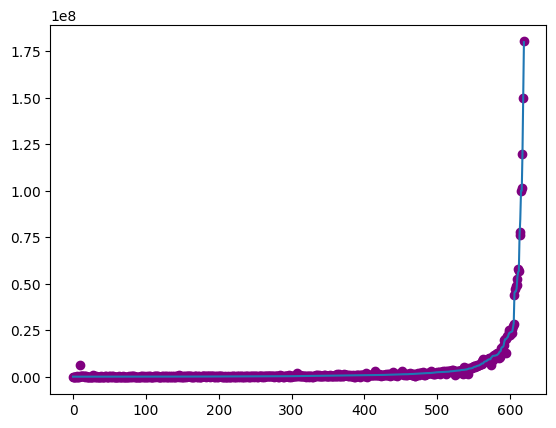

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


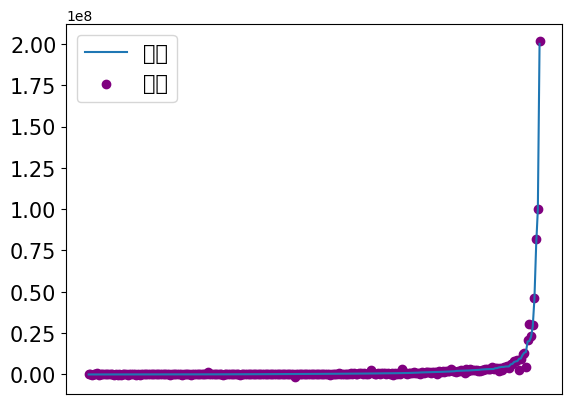

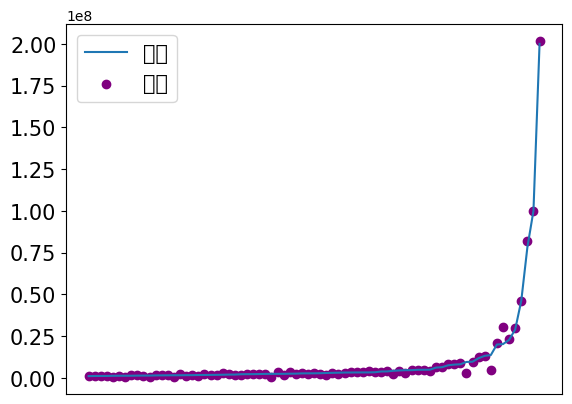

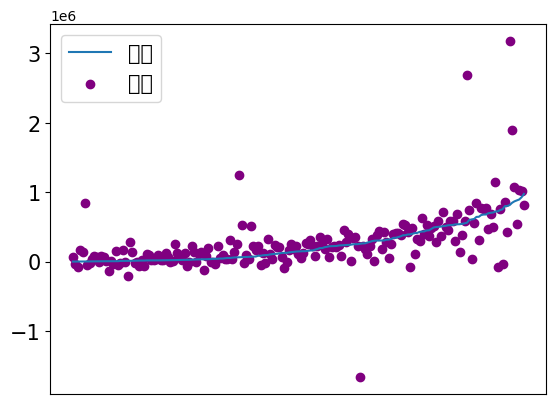

In [26]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)

df_show = pd.DataFrame(np.concatenate([y_train.values.reshape(-1, 1), y_train_pred.reshape(-1, 1)], axis = 1), columns = ['y_train', 'y_train_pred'])
df_show = df_show.sort_values(by = 'y_train').reset_index(drop = True)

plt.plot(df_show['y_train'])
plt.scatter(df_show.index, df_show['y_train_pred'], color = 'purple')
plt.show()

df_show = pd.DataFrame(np.concatenate([y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1)], axis = 1), columns = ['y_test', 'y_pred'])
df_show = df_show.sort_values(by = 'y_test').reset_index(drop = True)

plt.plot(df_show['y_test'], label = "정답")
plt.scatter(df_show.index, df_show['y_pred'], color = 'purple', label = '예측')
plt.xticks([])
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


df_show1 = df_show[df_show['y_test'] >= 1000000].reset_index(drop = True)
plt.plot(df_show1['y_test'], label = "정답")
plt.scatter(df_show1.index, df_show1['y_pred'], color = 'purple', label = '예측')
plt.xticks([])
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

df_show2 = df_show[df_show['y_test'] < 1000000].reset_index(drop = True)
plt.plot(df_show2['y_test'], label = "정답")
plt.scatter(df_show2.index, df_show2['y_pred'], color = 'purple', label = '예측')
plt.xticks([])
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()